In [1]:
################################
# Solves - u'' + u = f         #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [2]:
# Parameters
d = 1
k = 1
delta = 0.5
N = 9

# Computed Parameters
ranges = ((a, b),) * d
phi = rad.Wendland(d, k)
xc = rad.gridn(ranges, N, flat=True)
xc_idxs = [
    np.logical_not(np.any([np.logical_or(c == a, c == b) for c in xc], axis=0)),
    np.any([np.logical_or(c == a, c == b) for c in xc], axis=0),
]
operators = [
    lambda rbf, *args: - rbf.laplacian(*args) + rbf(*args),
    lambda rbf, *args: rbf.div(*args),
]
integrator = rad.integrate.MeanIntegrator(ranges, 1000)
# integrator = rad.integrate.QuadIntegrator(ranges, epsabs=1e-3, epsrel=1e-3)

# Solve for approximate solution
solver = rad.solve.CollocationSolver(operators, xc_idxs, phi, delta, *xc)
approx = solver.solve(f, g)
error = rad.error(exact, approx, integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 1.6988151600809291
Condition Number: 39.80711801173321


/home/keane/Projects/radiant/venv/lib/python3.10/site-packages/cupy/linalg/_solve.py:171: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  warnings.warn(


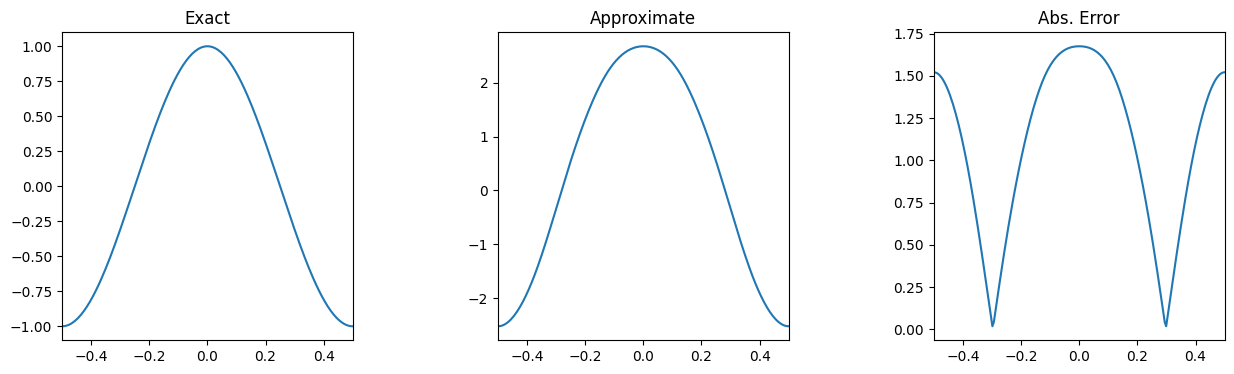

In [3]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x )),
    n=200,
    wspace=0.5,
    hspace=0.5,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4),
)

In [4]:
solver.mat.shape

(9, 9)